In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import json

In [6]:
# load posts
with open('posts.json', 'r') as f:
    posts = json.load(f)
print("Raw posts loaded:", len(posts))

Raw posts loaded: 523


In [10]:
users = set([post['user'] for post in posts.values()])
print(len(users))

210


In [30]:
quotes = []
for post in posts.values():
    quotes += post['quotes']
quotes = set(quotes)
print(len(quotes))
print(quotes)
quotes_in = [quote for quote in quotes if quote in users]
quotes_not_in = [quote for quote in quotes if quote not in users]
print(len(quotes_in))
print(len(quotes_not_in))
for q in quotes_not_in:
    print(q)

104
{'Unicorn hunter', 'myrc60', 'KaraG', 'beach43ofus', 'Weird Vivid Dreams after Pfizer', 'jerzdevil', 'Coloradomom22', 'Planning on getting the J & J this week', 'Chas863', 'elchevere', 'Roselvr', 'Sonny3', 'Natural510', 'Nanny Goat', 'shamrock4', 'HarryWarden', 'Arktikos', 'ncbeckster', 'jbgusa', 'mlj1225', 'Caramelized Onion', 'Pruzhany', 'vision33r', 'Teacher Terry', 'texan2yankee', 'KathrynAragon', 'otowi', 'chiluvr1228', 'zalewskimm', 'Moonlady', 'DanBev', 'Flamingo13', 'CentralUSHomeowner', 'mascoma', 'pinkjewel', 'charolastra00', 'SimplySagacious', 'MadManofBethesda', 'Icy Tea', 'skeddy', 'Sweet*Tea', 'Robinwomb', '2nd covid vaccine today, fever is 102.2', 'TravelingBoat', 'Mad_Jasper', 'adventuregurl', 'mitchmiller9', 'mountainrose', 'fluffythewondercat', 'Lola The yorkie', 'DKM', 'writerwife', 'Variable', 'Deserterer', 'exm', 'jen5276', 'lvmensch', 'Medical Lab Guy', 'Fiona8484', 'LO28SWM', 'CarnivalGal', 'mysticaltyger', 'newtovenice', 'ContraPagan', 'Newfangle9', 'Bette',

In [33]:
for i, post in enumerate(posts.values()):
    if 'COVID vaccine experience' in post['quotes']:
        print(post['id'], post['user'])

post60828575 vikesfanmb


In [23]:
G = nx.Graph()
G.add_nodes_from(['a', 'b', 'c', 'd'])
G.add_edge('a', 'e')

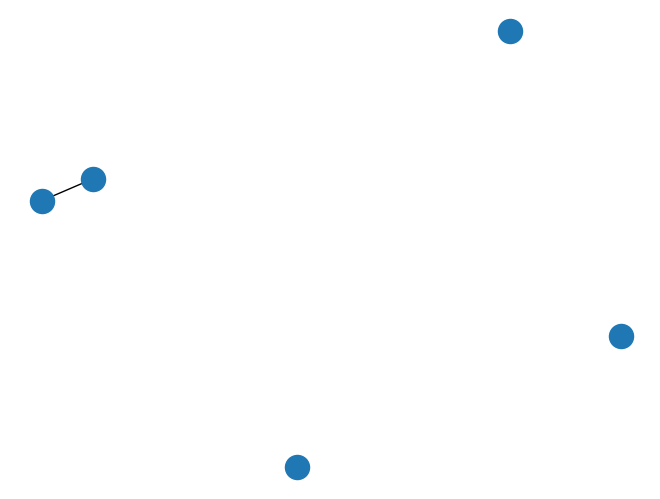

In [24]:
nx.draw(G)
plt.show()